## Analysis

### Trends Analysis:

#### Average precipitation, temperature, and wind speed for different weather conditions.
#### Identifying days with extreme weather conditions (highest precipitation, coldest temperatures, highest wind speeds).
#### Calculating moving averages for temperature trends to smooth fluctuations.


### Weather Impact Analysis:

#### Does higher wind speed correlate with snow or rain?
#### Are sunny days consistently warmer than rainy/snowy days?
#### Does precipitation tend to be higher on certain days of the week?


### Extreme Events Identification:

#### Hottest and coldest days within the dataset.
#### Days with highest and lowest precipitation levels.
#### Windy days classification (e.g., wind speed >5 m/s as high wind days).





In [1]:
%matplotlib inline

In [2]:
#import depedencies
import os
import pandas as pd
from pathlib import Path
from datetime import datetime as dt
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns


In [3]:
#define the file path
weather_seattle = Path("seattle-weather.csv")

In [4]:
#read the file
weather_seattle_df = pd.read_csv(weather_seattle)
weather_seattle_df

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


In [5]:
#check the columns
print(weather_seattle_df.columns)

Index(['date', 'precipitation', 'temp_max', 'temp_min', 'wind', 'weather'], dtype='object')


In [6]:
#get the data info
weather_seattle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [7]:
#to find total unique value for each column
weather_seattle_df.nunique()

date             1461
precipitation     111
temp_max           67
temp_min           55
wind               79
weather             5
dtype: int64

### Statistical Analysis

In [8]:
#descriptive statistic
weather_seattle_df.describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


In [9]:
# Correlation matrix
correlation_matrix = weather_seattle_df[['precipitation', 'temp_max', 'temp_min', 'wind']].corr()
correlation_matrix

,precipitation,temp_max,temp_min,wind
precipitation,1.000000,-0.228555,-0.072684,0.328045
temp_max,-0.228555,1.000000,0.875687,-0.164857
temp_min,-0.072684,0.875687,1.000000,-0.074185
wind,0.328045,-0.164857,-0.074185,1.000000


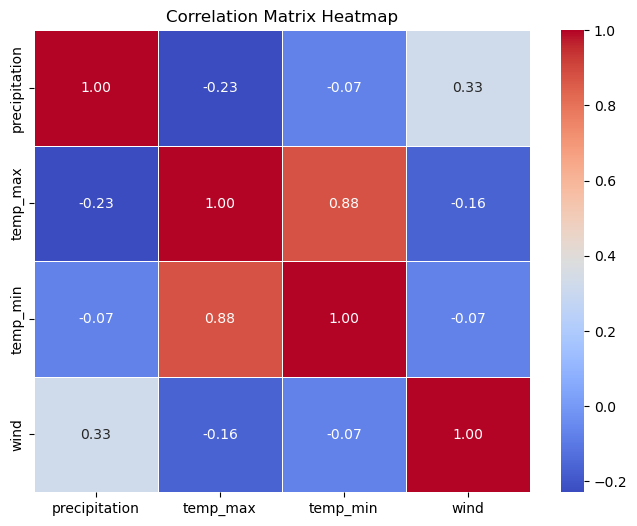

In [10]:
# Plot correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

#### Correlation Values:

Close to 1: Strong positive correlation.

Close to -1: Strong negative correlation.

Close to 0: No correlation.

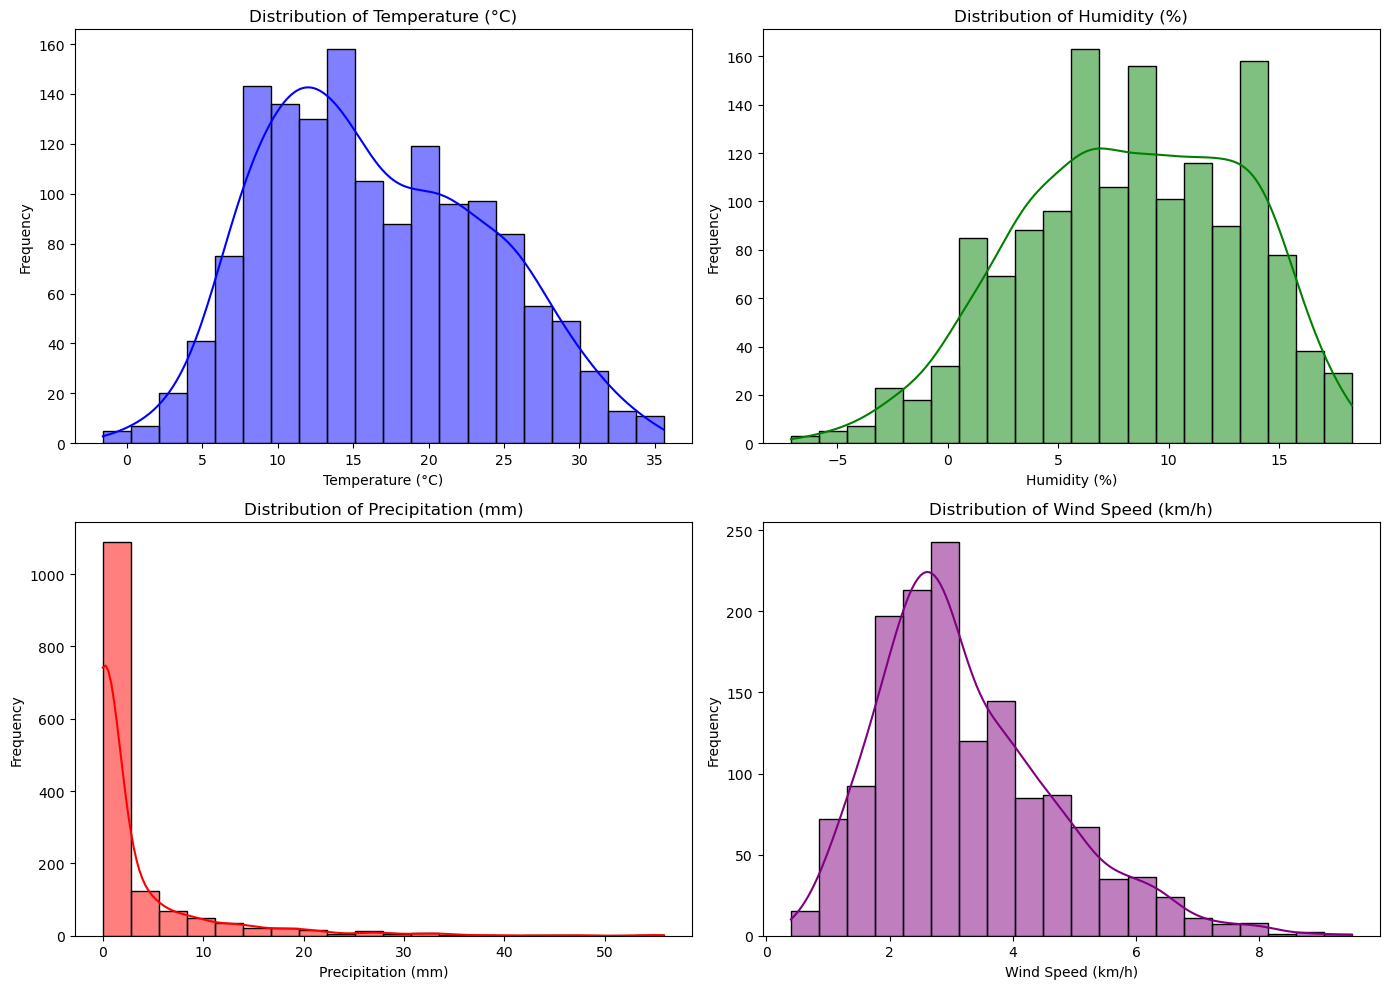

In [11]:
# Histogram for each numerical variable distribution

# Set up matplotlib figure for subplots
plt.figure(figsize=(14, 10))

# Histogram for Temperature
plt.subplot(2, 2, 1)
sns.histplot(weather_seattle_df['temp_max'], bins=20, kde=True, color='blue')
plt.title('Distribution of Temperature (°C)')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')

# Histogram for Humidity (New York dataset)
plt.subplot(2, 2, 2)
sns.histplot(weather_seattle_df['temp_min'], bins=20, kde=True, color='green')
plt.title('Distribution of Humidity (%)')
plt.xlabel('Humidity (%)')
plt.ylabel('Frequency')

# Histogram for Precipitation (New York dataset)
plt.subplot(2, 2, 3)
sns.histplot(weather_seattle_df['precipitation'], bins=20, kde=True, color='red')
plt.title('Distribution of Precipitation (mm)')
plt.xlabel('Precipitation (mm)')
plt.ylabel('Frequency')

# Histogram for Wind Speed (New York dataset)
plt.subplot(2, 2, 4)
sns.histplot(weather_seattle_df['wind'], bins=20, kde=True, color='purple')
plt.title('Distribution of Wind Speed (km/h)')
plt.xlabel('Wind Speed (km/h)')
plt.ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

### Weather Condition Analysis

/var/folders/df/dwj7lm7s3vzgwfn_gv80jsqw0000gn/T/ipykernel_2536/680361423.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=weather_seattle_df['weather'], order=weather_seattle_df['weather'].value_counts().index, palette="coolwarm")


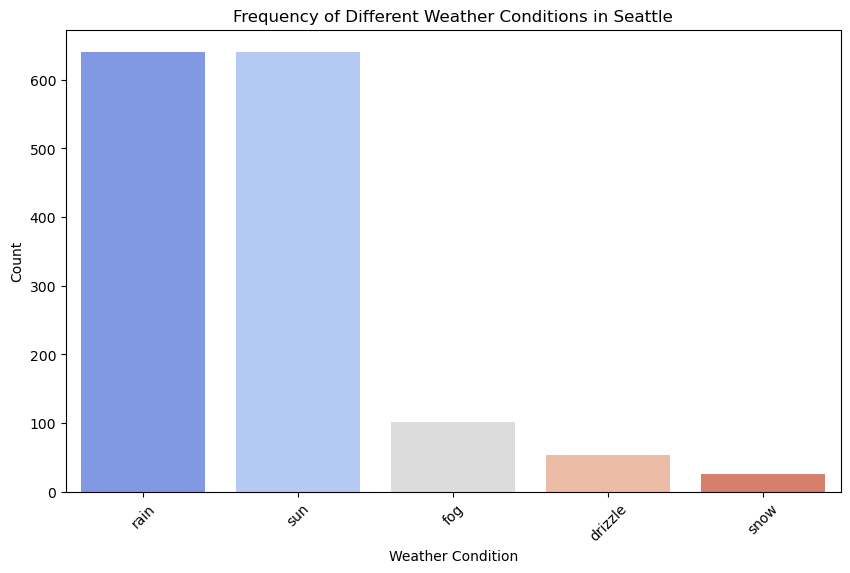

In [12]:
# Frequency of Weather Conditions (Bar Chart)
plt.figure(figsize=(10, 6))
sns.countplot(x=weather_seattle_df['weather'], order=weather_seattle_df['weather'].value_counts().index, palette="coolwarm")
plt.title("Frequency of Different Weather Conditions in Seattle")
plt.xlabel("Weather Condition")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


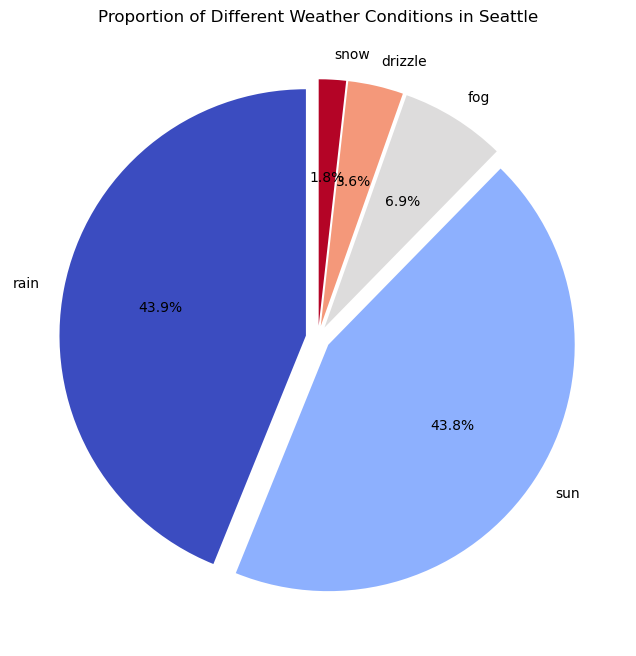

In [13]:
# Frequency of Weather Conditions (Pie Chart) - percentage
plt.figure(figsize=(8, 8))
weather_seattle_df['weather'].value_counts().plot.pie(
    autopct='%1.1f%%', 
    cmap="coolwarm", 
    startangle=90, 
    explode=[0.05]*weather_seattle_df['weather'].nunique())
plt.title("Proportion of Different Weather Conditions in Seattle")
plt.ylabel("")  # Hide y-label for clarity
plt.show()

In [14]:
# Weather Conditions by Month
# Convert 'date' column to datetime format
weather_seattle_df['date'] = pd.to_datetime(weather_seattle_df['date'])

# Extract month number and name
weather_seattle_df['month_number'] = weather_seattle_df['date'].dt.month  # Extract month number
weather_seattle_df['month_name'] = weather_seattle_df['date'].dt.strftime('%B')  # Extract full month name

# Display the first few rows to verify
print(weather_seattle_df[['date', 'month_number', 'month_name']])


           date  month_number month_name
0    2012-01-01             1    January
1    2012-01-02             1    January
2    2012-01-03             1    January
3    2012-01-04             1    January
4    2012-01-05             1    January
...         ...           ...        ...
1456 2015-12-27            12   December
1457 2015-12-28            12   December
1458 2015-12-29            12   December
1459 2015-12-30            12   December
1460 2015-12-31            12   December

[1461 rows x 3 columns]


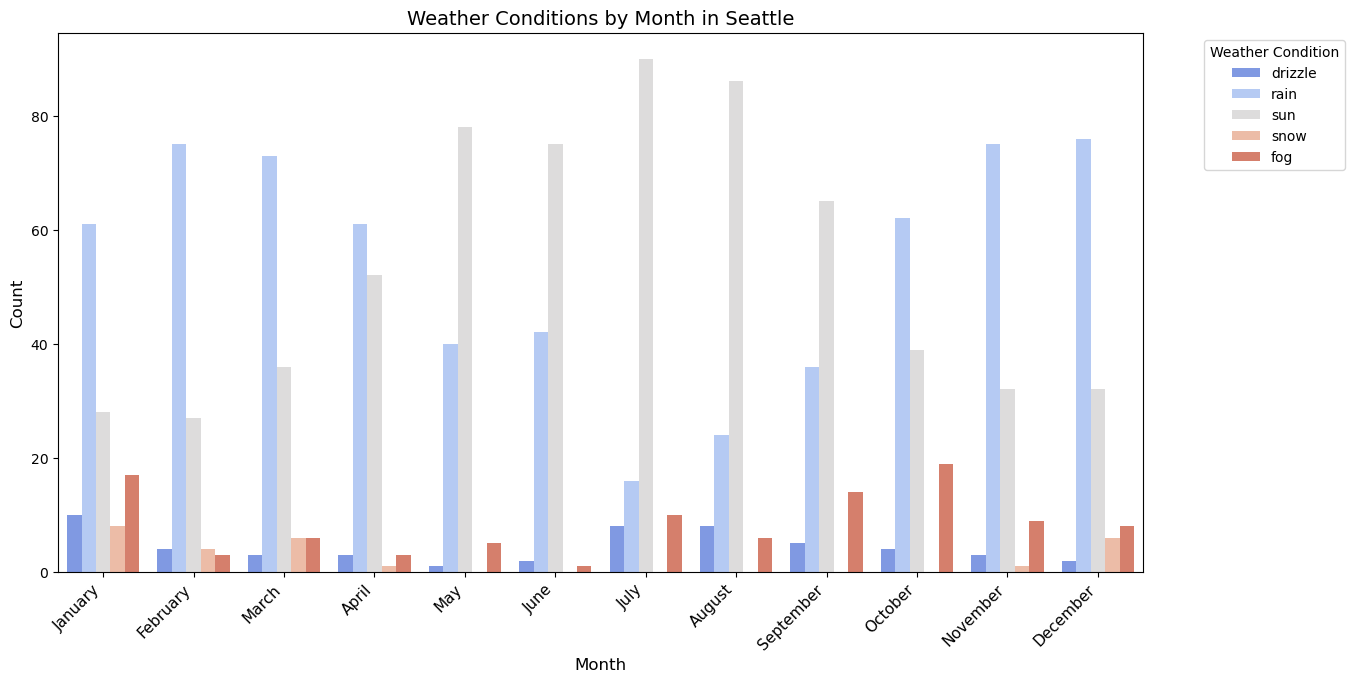

In [15]:
#weather condition by month

# Set figure size
plt.figure(figsize=(14, 7))

# Plot with adjusted bar width and spacing
sns.countplot(x=weather_seattle_df['month_name'], 
              hue=weather_seattle_df['weather'], 
              palette="coolwarm",
              dodge=True,  # Ensures better spacing for grouped bars
              width=0.8)  # Adjust bar width to make them bigger

# Improve title and labels
plt.title("Weather Conditions by Month in Seattle", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Count", fontsize=12)

# Adjust x-axis spacing for better readability
plt.xticks(rotation=45, ha='right', fontsize=11)  # Rotate and adjust font size for clarity

# Adjust legend position
plt.legend(title="Weather Condition", bbox_to_anchor=(1.05, 1), loc='upper left')

# Display plot
plt.show()

/var/folders/df/dwj7lm7s3vzgwfn_gv80jsqw0000gn/T/ipykernel_2536/1362417499.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=weather_seattle_df['weather'], y=weather_seattle_df['wind'], palette="coolwarm")


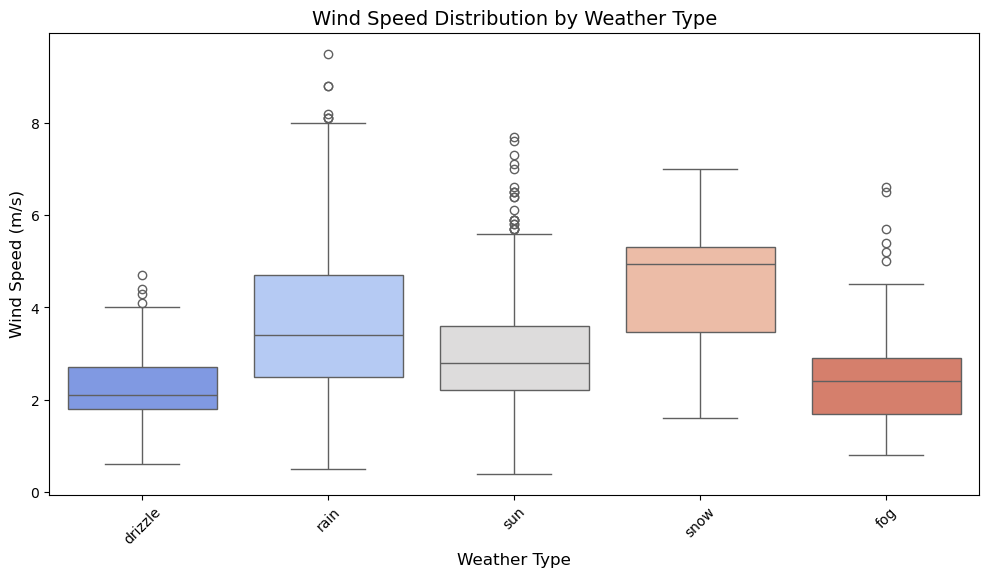

In [16]:

# --- Box Plot: Wind Speed Distribution by Weather Type ---
plt.figure(figsize=(12, 6))
sns.boxplot(x=weather_seattle_df['weather'], y=weather_seattle_df['wind'], palette="coolwarm")
plt.title("Wind Speed Distribution by Weather Type", fontsize=14)
plt.xlabel("Weather Type", fontsize=12)
plt.ylabel("Wind Speed (m/s)", fontsize=12)
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.show()


### Seasonal Analysis

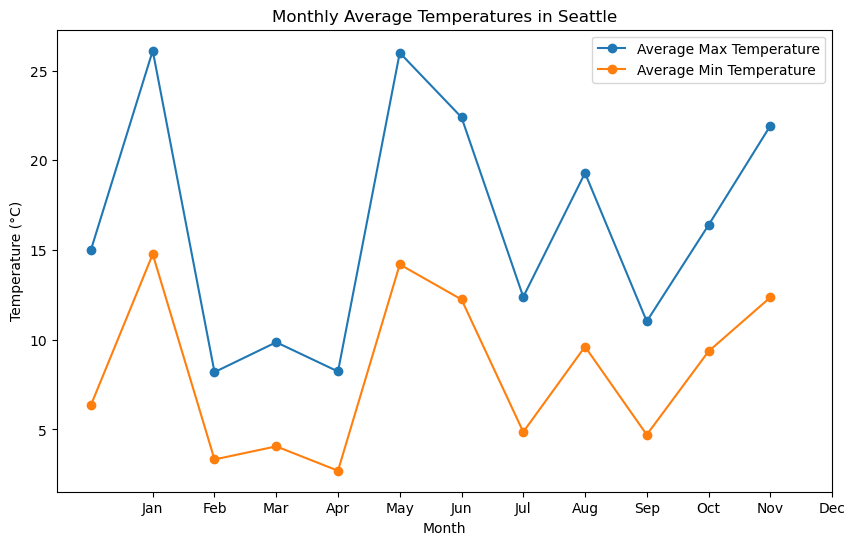

In [17]:
#Monthly Average Temperatures

# Group by month and calculate average max and min temperatures
monthly_avg_temps = weather_seattle_df.groupby('month_name')[['temp_max', 'temp_min']].mean()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(monthly_avg_temps.index, monthly_avg_temps['temp_max'], label='Average Max Temperature', marker='o')
plt.plot(monthly_avg_temps.index, monthly_avg_temps['temp_min'], label='Average Min Temperature', marker='o')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.title('Monthly Average Temperatures in Seattle')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()
#plt.grid(True)
plt.show()

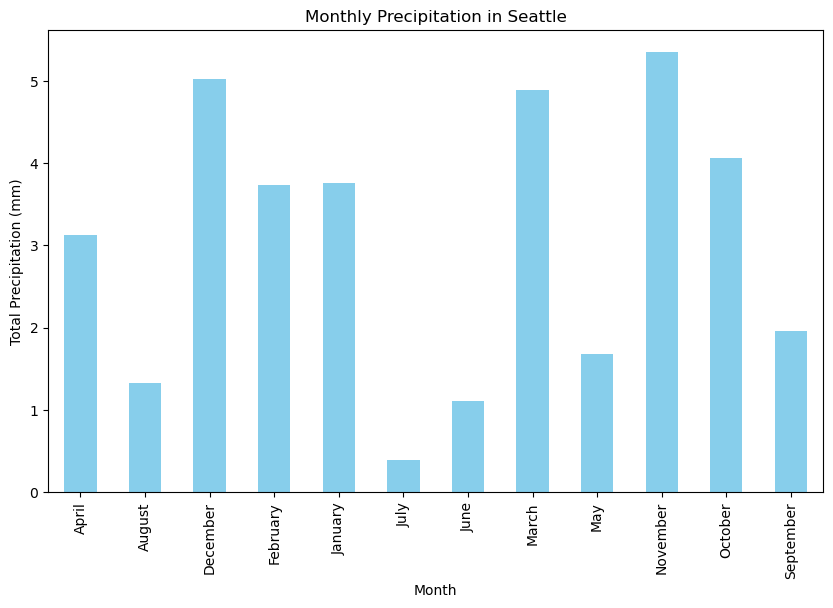

In [19]:
# Average monthly precipitation,

# Group by month and calculate average precipitation
monthly_precip = weather_seattle_df.groupby('month_name')['precipitation'].mean()

# Plotting
plt.figure(figsize=(10, 6))
monthly_precip.plot(kind='bar', color='skyblue')
plt.xlabel('Month')
plt.ylabel('Total Precipitation (mm)')
plt.title('Monthly Precipitation in Seattle')
#plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=0)
#plt.grid(True)
plt.show()

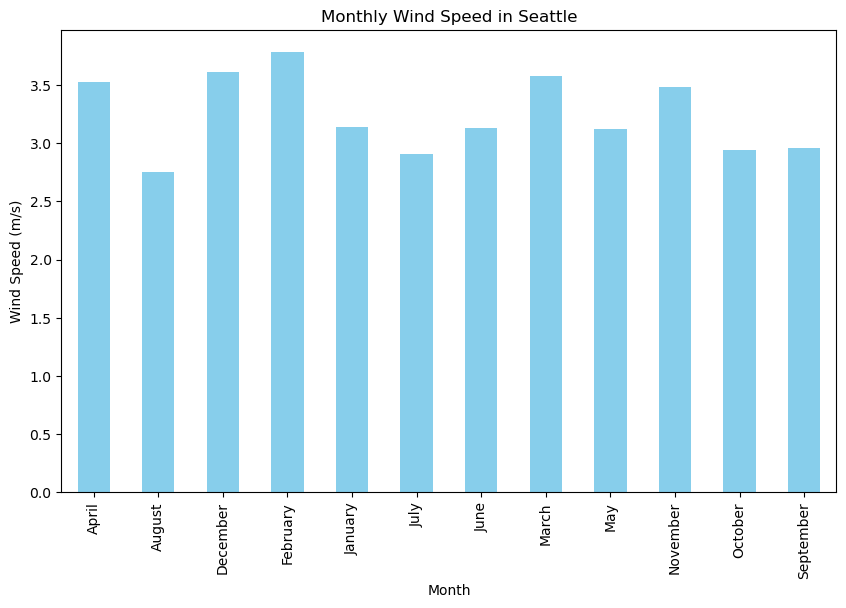

In [24]:
# Average monthly wind speed,

# Group by month and calculate average precipitation
monthly_precip = weather_seattle_df.groupby('month_name')['wind'].mean()

# Plotting
plt.figure(figsize=(10, 6))
monthly_precip.plot(kind='bar', color='skyblue')
plt.xlabel('Month')
plt.ylabel('Wind Speed (m/s)')
plt.title('Monthly Wind Speed in Seattle')
#plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=0)
#plt.grid(True)
plt.show()

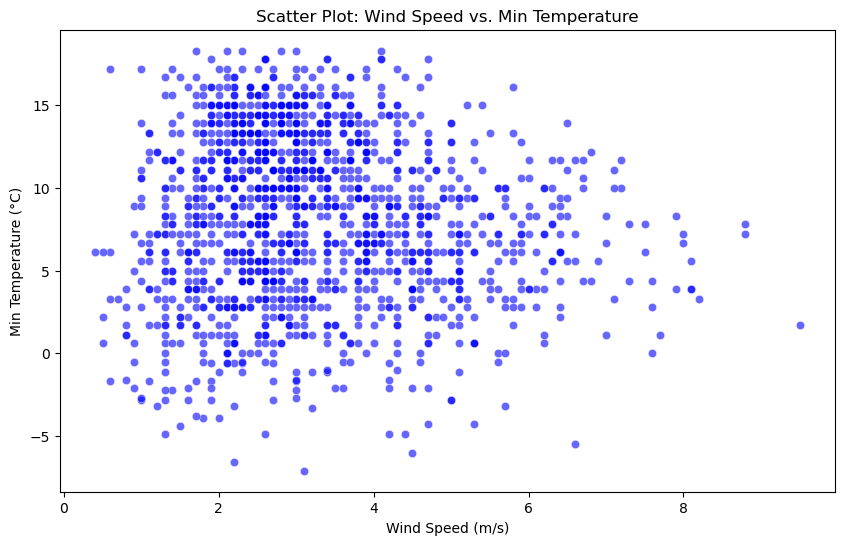

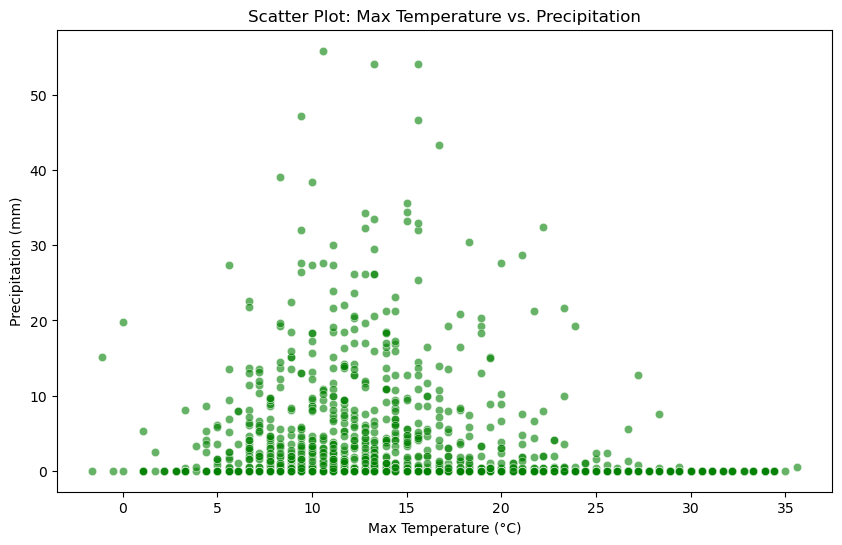

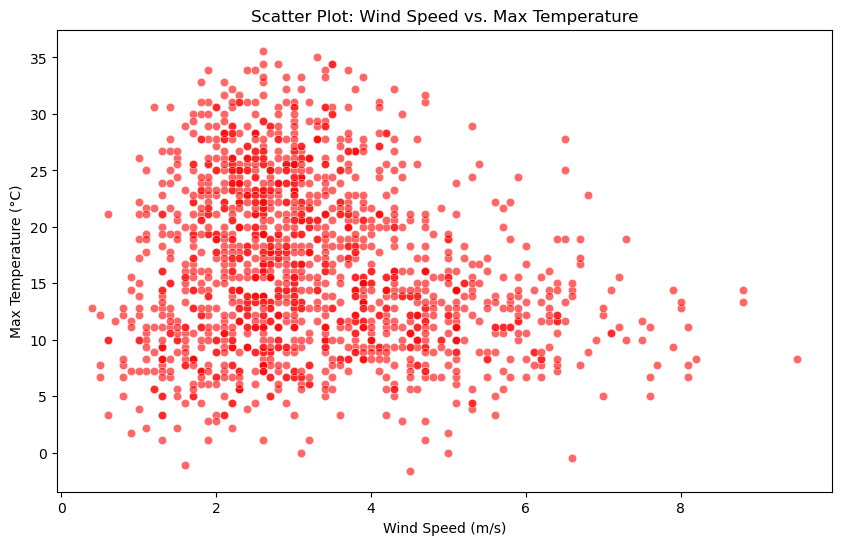

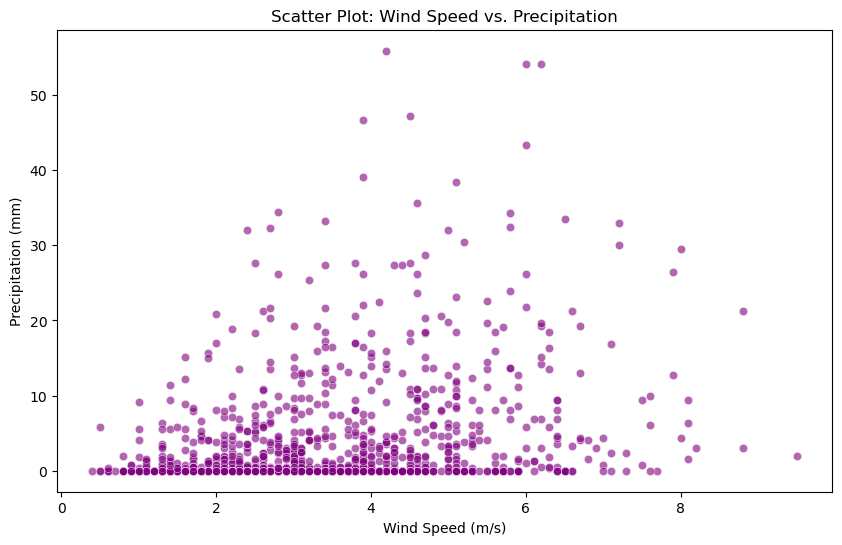

In [20]:
# Use scatter plots to visualize relationships between variables

# --- Scatter Plot: Temperature vs. Humidity ---
plt.figure(figsize=(10, 6))
sns.scatterplot(x=weather_seattle_df['wind'], y=weather_seattle_df['temp_min'], color='blue', alpha=0.6)
plt.title("Scatter Plot: Wind Speed vs. Min Temperature")
plt.xlabel("Wind Speed (m/s)")
plt.ylabel("Min Temperature (°C)")
plt.show()

# --- Scatter Plot: Temperature vs. Precipitation ---
plt.figure(figsize=(10, 6))
sns.scatterplot(x=weather_seattle_df['temp_max'], y=weather_seattle_df['precipitation'], color='green', alpha=0.6)
plt.title("Scatter Plot: Max Temperature vs. Precipitation")
plt.xlabel("Max Temperature (°C)")
plt.ylabel("Precipitation (mm)")
plt.show()

# --- Scatter Plot: Wind Speed vs. Temperature ---
plt.figure(figsize=(10, 6))
sns.scatterplot(x=weather_seattle_df['wind'], y=weather_seattle_df['temp_max'], color='red', alpha=0.6)
plt.title("Scatter Plot: Wind Speed vs. Max Temperature")
plt.xlabel("Wind Speed (m/s)")
plt.ylabel("Max Temperature (°C)")
plt.show()

# --- Scatter Plot: Wind Speed vs. Precipitation ---
plt.figure(figsize=(10, 6))
sns.scatterplot(x=weather_seattle_df['wind'], y=weather_seattle_df['precipitation'], color='purple', alpha=0.6)
plt.title("Scatter Plot: Wind Speed vs. Precipitation")
plt.xlabel("Wind Speed (m/s)")
plt.ylabel("Precipitation (mm)")
plt.show()


In [21]:
#to see the unique year
# Convert to datetime
weather_seattle_df['date'] = pd.to_datetime(weather_seattle_df['date'])

# Extract unique years
unique_years = weather_seattle_df['date'].dt.year.unique()

# Display result
print(unique_years)

[2012 2013 2014 2015]


In [22]:
#to see the unique month
# Convert to datetime
weather_seattle_df['date'] = pd.to_datetime(weather_seattle_df['date'])

# Extract unique years
unique_month = weather_seattle_df['date'].dt.month.unique()

# Display result
print(unique_month)

[ 1  2  3  4  5  6  7  8  9 10 11 12]
